# Regression Analysis with Deep Learning in Tensorflow



## Getting Familiar with the Data

Data from a Kaggle data set:https://www.kaggle.com/harlfoxem/housesalesprediction will be used.

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Feature Columns of dataset are as follows;


#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis & Feature Engineering

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.drop(['id','zipcode'], axis = 1, inplace = True)

In [5]:
df.nunique()

date              372
price            3622
bedrooms           12
bathrooms          29
sqft_living      1034
sqft_lot         9776
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        942
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5033
long              751
sqft_living15     777
sqft_lot15       8682
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

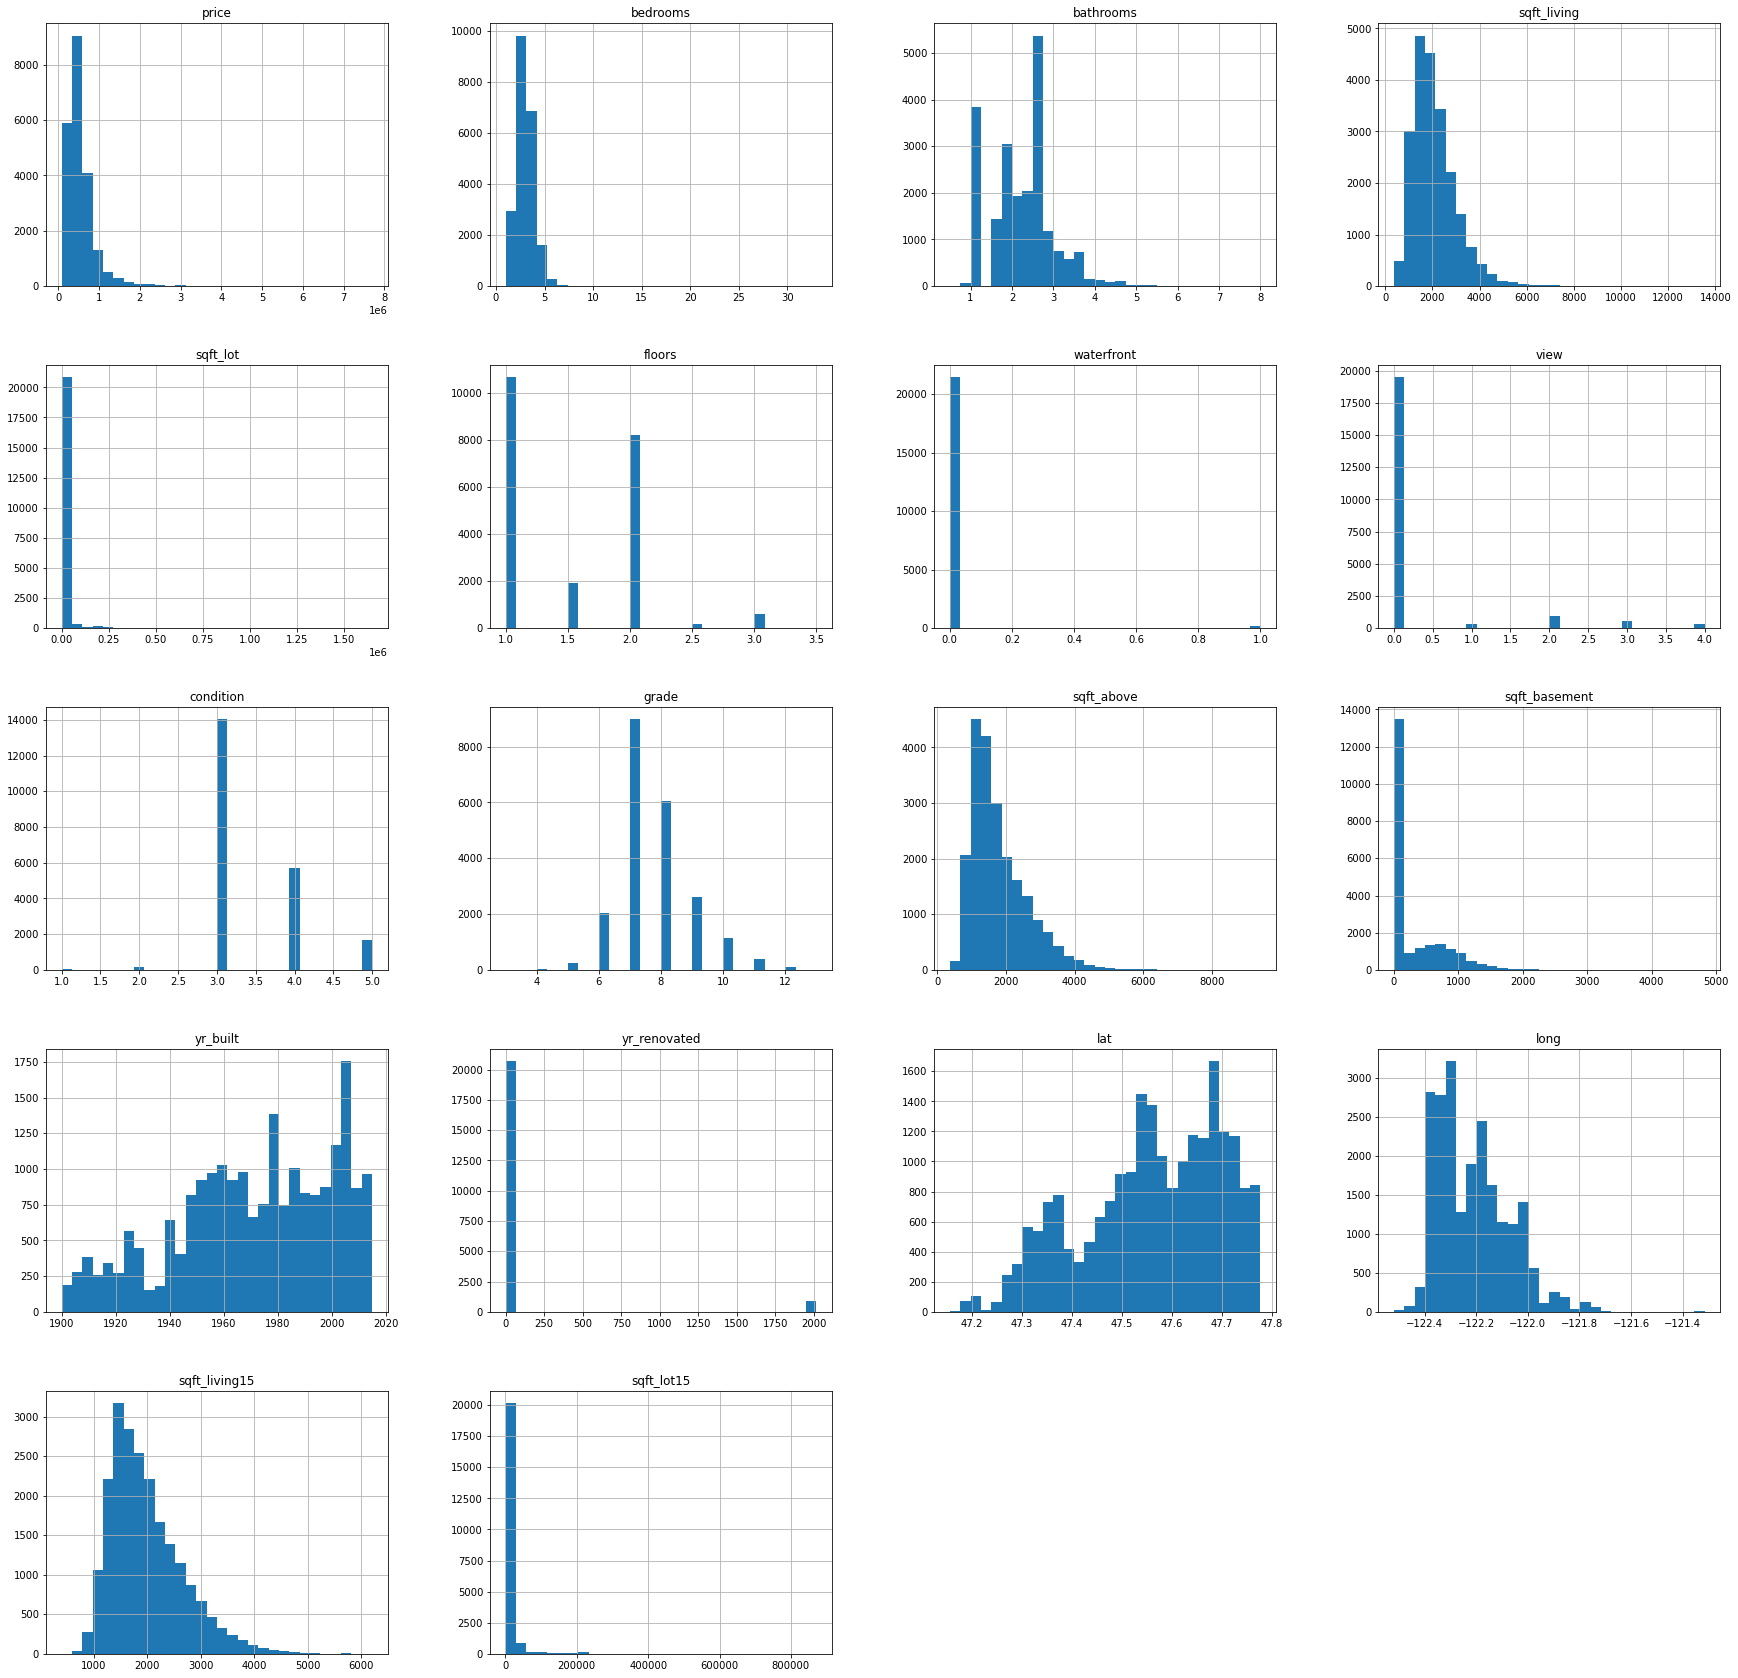

In [7]:
num_df = df.select_dtypes(exclude=['object'])
num_df.hist(bins=30, figsize=(30,30))
plt.show();

In [8]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [9]:
df['bathrooms']=round(df['bathrooms'])
df['bedrooms']=round(df['bedrooms'])
df['floors']=round(df['floors'])

In [10]:
bath_bed = ['bathrooms', 'bedrooms']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[bath_bed[0]], df[bath_bed[1]]).style.background_gradient(cmap = cm)

bedrooms,1,2,3,4,5,6,7,8,9,10,11,33
bathrooms,,,,,,,,,,,,
0.0,1,2,0,1,0,0,0,0,0,0,0,0
1.0,167,1587,1800,327,43,6,1,0,0,0,0,0
2.0,28,1129,7186,4709,695,90,7,1,0,1,0,1
3.0,0,41,656,1219,506,88,7,6,2,1,1,0
4.0,0,1,182,601,321,72,17,4,3,0,0,0
5.0,0,0,0,19,22,12,2,1,0,1,0,0
6.0,0,0,0,6,13,2,2,1,0,0,0,0
7.0,0,0,0,0,1,0,1,0,0,0,0,0
8.0,0,0,0,0,0,2,1,0,1,0,0,0


In [11]:
con_grade = ['condition', 'grade']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[con_grade[0]], df[con_grade[1]]).style.background_gradient(cmap = cm)

grade,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,
1,0,1,9,11,6,2,0,0,0,0,0
2,0,4,15,59,75,13,2,2,0,0,0
3,0,12,100,1035,5229,4266,2041,921,332,73,11
4,0,10,84,685,2831,1394,446,156,56,13,2
5,1,0,34,248,833,390,126,55,11,3,0


In [12]:
water_cond = ['waterfront', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[water_cond[0]], df[water_cond[1]]).style.background_gradient(cmap = cm)

condition,1,2,3,4,5
waterfront,,,,,
0,28,169,13929,5627,1681
1,1,1,91,50,20


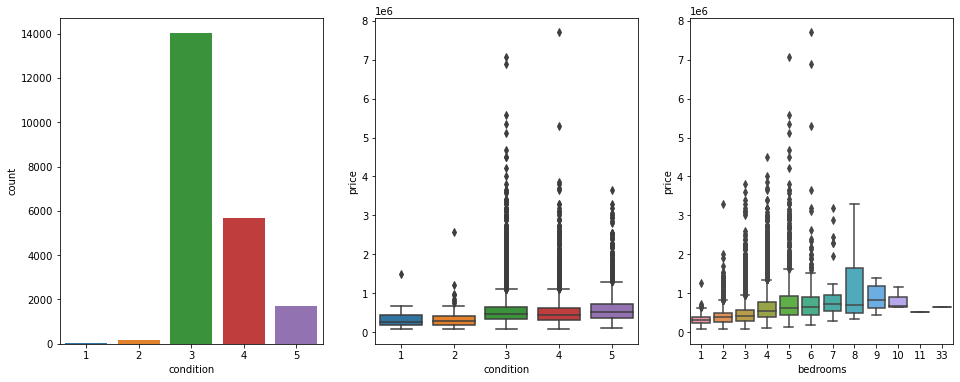

In [13]:
fig, ax = plt.subplots(ncols=3, figsize=(16,6))
sns.countplot(x='condition', data=df, ax=ax[0])
sns.boxplot(x='condition', y= 'price',data=df, ax=ax[1])
sns.boxplot(x='bedrooms', y='price', data=df, ax=ax[2]);
plt.show();

<Figure size 1152x720 with 0 Axes>

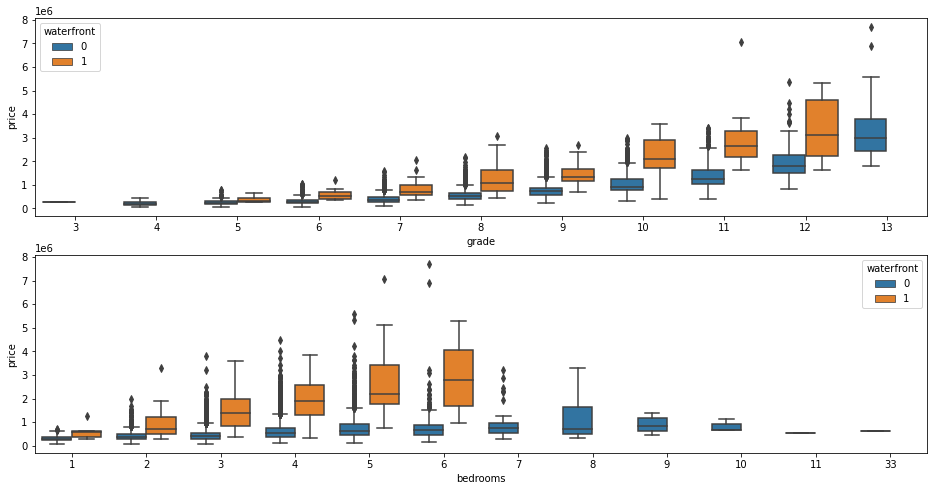

In [14]:
plt.figure(figsize=(16,10))
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.boxplot(x='grade', y='price', data=df, hue='waterfront',ax=ax[0])
sns.boxplot(x='bedrooms', y='price', data=df, hue='waterfront', ax=ax[1])
plt.show();

In [15]:
df.date=pd.to_datetime(df.date)
df['year']=df.date.apply(lambda date: date.year)
df['month']=df.date.apply(lambda date: date.month)
df.drop('date', axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


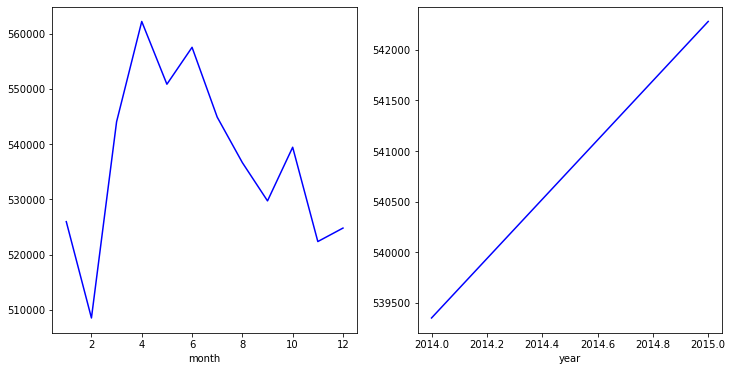

In [16]:
fig, ax = plt.subplots(1,2) 
df.groupby("month").mean()["price"].plot(ax=ax[0], figsize=(12,6),c="blue")
df.groupby("year").mean()["price"].plot(ax=ax[1], figsize=(12,6),c="blue");

In [17]:
df['house_age']=2015-df.yr_built
df.drop('yr_built', axis=1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,2014,10,60
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,2014,12,64
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,2014,12,50
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,2015,2,28


In [18]:

df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.244832
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
house_age       -0.053953
Name: price, dtype: float64

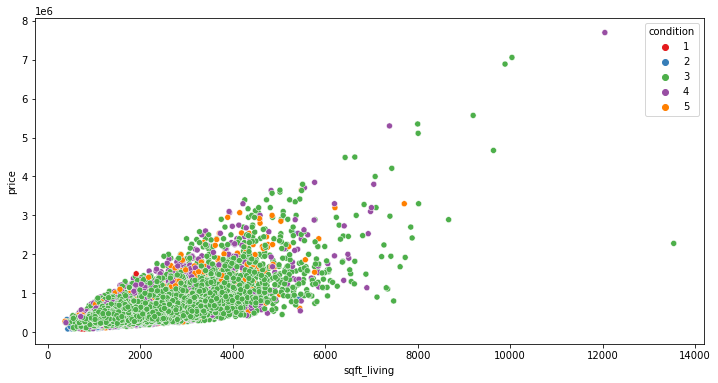

In [19]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['sqft_living'],y=df['price'],hue=df['condition'],palette='Set1')
plt.show();

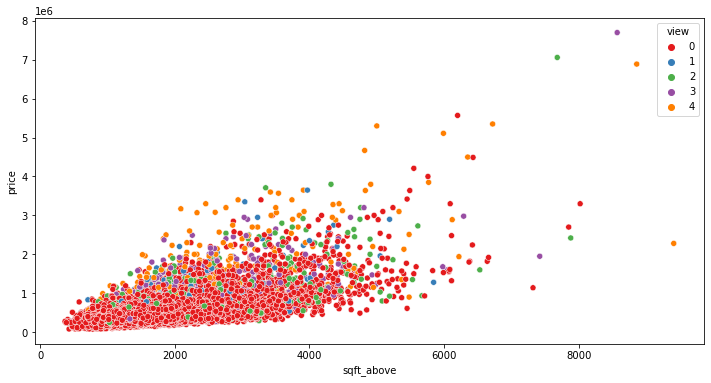

In [20]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['sqft_above'],y=df['price'],data =df, hue=df['view'],palette='Set1')
plt.show();

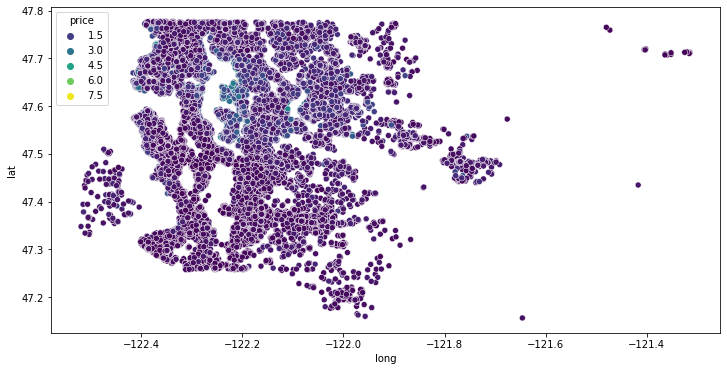

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis');

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,2014,10,60
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,2014,12,64
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,2014,12,50
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,2015,2,28


In [23]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
def renovate(x):
    if x > 0:
        x = 1
    return x
df["renovated"]=df["yr_renovated"].apply(renovate)
df.drop('yr_renovated', axis=1, inplace = True)
df.renovated.value_counts()

0    20683
1      914
Name: renovated, dtype: int64

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year,month,house_age,renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,2014,10,60,0
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2014,12,64,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,2015,2,82,0
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,2014,12,50,0
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2015,2,28,0


In [26]:
df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.244832
renovated        0.126082
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
house_age       -0.053953
Name: price, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  year           21597 non-null  int64  
 17  month          21597 non-null  int64  
 18  house_

In [28]:
df['floors']=df['floors'].astype('object')
df['waterfront']=df['waterfront'].astype('object')
df['view']=df['view'].astype('object')
df['condition']=df['condition'].astype('object')
df['grade']=df['grade'].astype('object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  object 
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  year           21597 non-null  int64  
 17  month          21597 non-null  int64  
 18  house_

In [30]:
cat_df=df.select_dtypes(include='object')
num_df=df.select_dtypes(exclude='object')

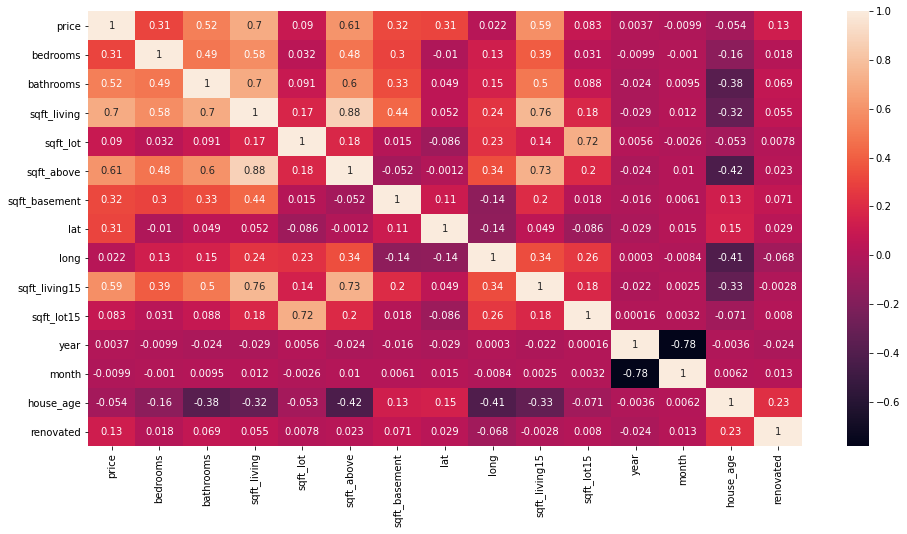

In [31]:
plt.figure(figsize=[16,8])
sns.heatmap(num_df.corr(),annot=True)
plt.show();

In [32]:
num_df.corr().price.sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.519628
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
renovated        0.126082
sqft_lot         0.089876
sqft_lot15       0.082845
long             0.022036
year             0.003727
month           -0.009928
house_age       -0.053953
Name: price, dtype: float64

In [33]:
num_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'house_age', 'renovated'],
      dtype='object')

In [34]:
num_df.drop('price', axis = 1, inplace = True)

### Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_num_df= scaler.fit_transform(num_df)
scaled_num_df=pd.DataFrame(scaled_num_df)
scaled_num_df.columns=num_df.columns
scaled_num_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year,month,house_age,renovated
0,0.06250,0.125,0.061503,0.003108,0.089602,0.000000,0.571498,0.217608,0.161934,0.005742,0.0,0.818182,0.521739,0.0
1,0.06250,0.250,0.167046,0.004072,0.199115,0.082988,0.908959,0.166113,0.222165,0.008027,0.0,1.000000,0.556522,1.0
2,0.03125,0.125,0.030372,0.005743,0.044248,0.000000,0.936143,0.237542,0.399415,0.008513,1.0,0.090909,0.713043,0.0
3,0.09375,0.375,0.120729,0.002714,0.075221,0.188797,0.586939,0.104651,0.165376,0.004996,0.0,1.000000,0.434783,0.0
4,0.06250,0.250,0.099468,0.004579,0.144912,0.000000,0.741354,0.393688,0.241094,0.007871,1.0,0.090909,0.243478,0.0


In [36]:
cat_df.columns

Index(['floors', 'waterfront', 'view', 'condition', 'grade'], dtype='object')

In [37]:
cat_dum_df=pd.get_dummies(cat_df,columns=['floors', 'waterfront', 'view', 'condition', 'grade'],drop_first=True)
cat_dum_df.head()

,floors_2.0,floors_3.0,floors_4.0,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [38]:
final_df=pd.concat([scaled_num_df,cat_dum_df, df[['price']]],axis=1)
final_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,price
0,0.06250,0.125,0.061503,0.003108,0.089602,0.000000,0.571498,0.217608,0.161934,0.005742,...,0,0,1,0,0,0,0,0,0,221900.0
1,0.06250,0.250,0.167046,0.004072,0.199115,0.082988,0.908959,0.166113,0.222165,0.008027,...,0,0,1,0,0,0,0,0,0,538000.0
2,0.03125,0.125,0.030372,0.005743,0.044248,0.000000,0.936143,0.237542,0.399415,0.008513,...,0,1,0,0,0,0,0,0,0,180000.0
3,0.09375,0.375,0.120729,0.002714,0.075221,0.188797,0.586939,0.104651,0.165376,0.004996,...,0,0,1,0,0,0,0,0,0,604000.0
4,0.06250,0.250,0.099468,0.004579,0.144912,0.000000,0.741354,0.393688,0.241094,0.007871,...,0,0,0,1,0,0,0,0,0,510000.0


## Model Development

### Train Test Split

In [39]:
X = final_df.drop('price',axis = 1).values
y = final_df['price'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
X_train.shape

(15117, 36)

## Creating a Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [44]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=20)
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=64,epochs=600, callbacks=[early_stop])

Epoch 1/600
237/237 [==============================] - 1s 4ms/step - loss: 430427281321.9496 - val_loss: 384350650368.0000
Epoch 2/600
237/237 [==============================] - 0s 824us/step - loss: 303265470033.7479 - val_loss: 101450858496.0000
Epoch 3/600
237/237 [==============================] - 0s 805us/step - loss: 100861087795.6302 - val_loss: 89380315136.0000
Epoch 4/600
237/237 [==============================] - 0s 761us/step - loss: 88406443154.2857 - val_loss: 79244861440.0000
Epoch 5/600
237/237 [==============================] - 0s 1ms/step - loss: 79287724066.4202 - val_loss: 69966086144.0000
Epoch 6/600
237/237 [==============================] - 0s 1ms/step - loss: 57019179197.3109 - val_loss: 63434383360.0000
Epoch 7/600
237/237 [==============================] - 0s 817us/step - loss: 60374424102.7227 - val_loss: 56692572160.0000
Epoch 8/600
237/237 [==============================] - 0s 787us/step - loss: 53576343018.4874 - val_loss: 53051641856.0000
Epoch 9/600
237/2

237/237 [==============================] - 0s 787us/step - loss: 29719499819.0252 - val_loss: 33138929664.0000
Epoch 68/600
237/237 [==============================] - 0s 779us/step - loss: 32167846890.4874 - val_loss: 33108983808.0000
Epoch 69/600
237/237 [==============================] - 0s 790us/step - loss: 28622637675.5630 - val_loss: 33046648832.0000
Epoch 70/600
237/237 [==============================] - 0s 827us/step - loss: 31292674581.5126 - val_loss: 33142517760.0000
Epoch 71/600
237/237 [==============================] - 0s 801us/step - loss: 29501866560.5378 - val_loss: 32902010880.0000
Epoch 72/600
237/237 [==============================] - 0s 800us/step - loss: 32339081947.4286 - val_loss: 32823914496.0000
Epoch 73/600
237/237 [==============================] - 0s 796us/step - loss: 30422351045.9160 - val_loss: 32767483904.0000
Epoch 74/600
237/237 [==============================] - 0s 807us/step - loss: 30618749900.3697 - val_loss: 32742096896.0000
Epoch 75/600
237/237 

Epoch 133/600
237/237 [==============================] - 0s 942us/step - loss: 27133515698.5546 - val_loss: 31772557312.0000
Epoch 134/600
237/237 [==============================] - 0s 1ms/step - loss: 27328157205.5126 - val_loss: 31683762176.0000
Epoch 135/600
237/237 [==============================] - 0s 955us/step - loss: 25952212316.5042 - val_loss: 31595124736.0000
Epoch 136/600
237/237 [==============================] - 0s 827us/step - loss: 25574241383.2605 - val_loss: 31641583616.0000
Epoch 137/600
237/237 [==============================] - 0s 890us/step - loss: 26928604538.6218 - val_loss: 31555504128.0000
Epoch 138/600
237/237 [==============================] - 0s 887us/step - loss: 26751226970.3529 - val_loss: 31560333312.0000
Epoch 139/600
237/237 [==============================] - 0s 870us/step - loss: 27070670667.2941 - val_loss: 31666511872.0000
Epoch 140/600
237/237 [==============================] - 0s 842us/step - loss: 28495153762.9580 - val_loss: 31510847488.0000
Ep

237/237 [==============================] - 0s 867us/step - loss: 26220348549.3782 - val_loss: 30555246592.0000
Epoch 199/600
237/237 [==============================] - 0s 851us/step - loss: 25857643468.3697 - val_loss: 30410184704.0000
Epoch 200/600
237/237 [==============================] - 0s 849us/step - loss: 27253791563.2941 - val_loss: 30357286912.0000
Epoch 201/600
237/237 [==============================] - 0s 926us/step - loss: 26244687381.5126 - val_loss: 30361372672.0000
Epoch 202/600
237/237 [==============================] - 0s 831us/step - loss: 26974767766.5882 - val_loss: 30510604288.0000
Epoch 203/600
237/237 [==============================] - 0s 843us/step - loss: 25657568496.9412 - val_loss: 30318837760.0000
Epoch 204/600
237/237 [==============================] - 0s 858us/step - loss: 25813573653.5126 - val_loss: 30350835712.0000
Epoch 205/600
237/237 [==============================] - 0s 921us/step - loss: 26997046392.4706 - val_loss: 30366152704.0000
Epoch 206/600


Epoch 264/600
237/237 [==============================] - 0s 852us/step - loss: 25409433987.2269 - val_loss: 29632520192.0000
Epoch 265/600
237/237 [==============================] - 0s 834us/step - loss: 25455719535.8655 - val_loss: 29762000896.0000
Epoch 266/600
237/237 [==============================] - 0s 823us/step - loss: 25202340459.5630 - val_loss: 29502922752.0000
Epoch 267/600
237/237 [==============================] - 0s 848us/step - loss: 26256889529.0084 - val_loss: 29602760704.0000
Epoch 268/600
237/237 [==============================] - 0s 811us/step - loss: 24666160825.0084 - val_loss: 29605939200.0000
Epoch 269/600
237/237 [==============================] - 0s 849us/step - loss: 24918605789.5798 - val_loss: 29551347712.0000
Epoch 270/600
237/237 [==============================] - 0s 848us/step - loss: 23682109138.8235 - val_loss: 29448773632.0000
Epoch 271/600
237/237 [==============================] - 0s 848us/step - loss: 25158410317.4454 - val_loss: 29445894144.0000


Epoch 330/600
237/237 [==============================] - 0s 974us/step - loss: 25147451417.8151 - val_loss: 29072211968.0000
Epoch 331/600
237/237 [==============================] - 0s 922us/step - loss: 23569910130.0168 - val_loss: 29026189312.0000
Epoch 332/600
237/237 [==============================] - 0s 873us/step - loss: 24178976587.2941 - val_loss: 29014503424.0000
Epoch 333/600
237/237 [==============================] - 0s 821us/step - loss: 24841524714.4874 - val_loss: 29644539904.0000
Epoch 334/600
237/237 [==============================] - 0s 1ms/step - loss: 23983185614.5210 - val_loss: 28906389504.0000
Epoch 335/600
237/237 [==============================] - 0s 932us/step - loss: 23193095701.5126 - val_loss: 28937617408.0000
Epoch 336/600
237/237 [==============================] - 0s 941us/step - loss: 23735315129.0084 - val_loss: 29076795392.0000
Epoch 337/600
237/237 [==============================] - 0s 897us/step - loss: 23906680978.2857 - val_loss: 29008818176.0000
Ep

Epoch 396/600
237/237 [==============================] - 0s 883us/step - loss: 23093059308.6387 - val_loss: 28765650944.0000
Epoch 397/600
237/237 [==============================] - 0s 893us/step - loss: 22816541433.5462 - val_loss: 28717131776.0000
Epoch 398/600
237/237 [==============================] - 0s 1ms/step - loss: 24050723710.9244 - val_loss: 28798685184.0000
Epoch 399/600
237/237 [==============================] - 0s 934us/step - loss: 22991661348.5714 - val_loss: 28718940160.0000
Epoch 400/600
237/237 [==============================] - 0s 819us/step - loss: 23133527001.2773 - val_loss: 28726052864.0000
Epoch 401/600
237/237 [==============================] - 0s 927us/step - loss: 22396070722.6891 - val_loss: 29146773504.0000
Epoch 402/600
237/237 [==============================] - 0s 861us/step - loss: 23045759371.8319 - val_loss: 28705187840.0000
Epoch 403/600
237/237 [==============================] - 0s 871us/step - loss: 23084978571.8319 - val_loss: 28751249408.0000
Ep

In [46]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,4.247905e+11,3.843507e+11
1,2.100088e+11,1.014509e+11
2,9.578391e+10,8.938032e+10
3,8.384147e+10,7.924486e+10
4,7.339022e+10,6.996609e+10
...,...,...
399,2.309667e+10,2.872605e+10
400,2.303027e+10,2.914677e+10
401,2.313507e+10,2.870519e+10
402,2.303417e+10,2.875125e+10


<AxesSubplot:>

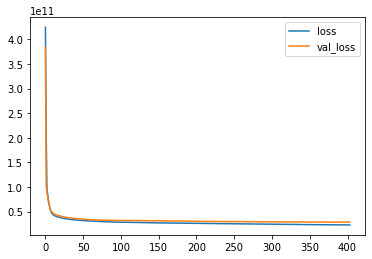

In [47]:
losses.plot()

In [48]:
losses.loss.idxmin() 

400

## Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [50]:
y_pred= model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.7833119864156259 
 mae: 101889.48871045525 
 mse: 28732498185.19679 
 rmse: 169506.6316850075


In [51]:
my_dict={"Actual":y_test, "Pred":y_pred.reshape(6480,)}
compare=pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
6092,915000.0,418760.093750
3755,329000.0,475237.812500
4431,236000.0,213883.296875
545,690500.0,599163.937500
2507,402395.0,479309.781250
535,990000.0,810538.125000
2805,540000.0,585144.750000
1772,445000.0,378715.906250
2190,760000.0,569058.687500
338,530000.0,564772.437500
